### By Ranjit Singh Bisht

### Import Libraries

In [18]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Data preparation 

In [19]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### Splitting the dataset into train and test

In [20]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

### Exploring the Database


In [21]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


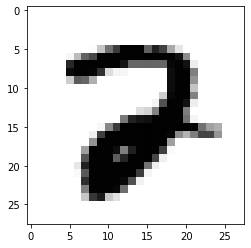

In [22]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
import os    


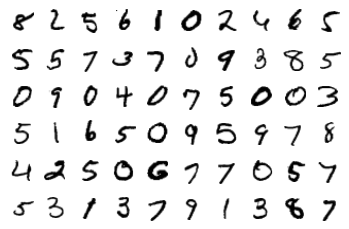

In [23]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

###  Build The Neural Network

In [127]:
input_size = 784
hidden_sizes = [49]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=49, bias=True)
  (1): ReLU()
  (2): Linear(in_features=49, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [128]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

### Adjusting Weights

In [129]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0108,  0.0108,  0.0108,  ...,  0.0108,  0.0108,  0.0108],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0097, -0.0097, -0.0097,  ..., -0.0097, -0.0097, -0.0097],
        ...,
        [-0.0126, -0.0126, -0.0126,  ..., -0.0126, -0.0126, -0.0126],
        [-0.0132, -0.0132, -0.0132,  ..., -0.0132, -0.0132, -0.0132],
        [-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045]])


### Core Training Process

In [130]:
optimizer = optim.SGD(model.parameters(), lr=0.25, momentum=0.9)
time0 = time()
epochs = 10
plot=[]
for e in range(epochs):
    running_loss = 0
    correct = 0
    total=0
    
    
    correct_count, all_count = 0, 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        running_loss += loss.item()
        
        ##extra
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)

        correct += (predicted == labels).sum().item()
        
    correct_count, all_count = 0, 0
    for images,labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)


            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1
    print("Epoch {} ".format(e))
    print("Number Of test error =", all_count-correct_count)
    print("\nModel Accuracy =", (correct_count/all_count))   
    plot.append(all_count-correct_count)
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 
Number Of test error = 8972

Model Accuracy = 0.1028
Epoch 1 
Number Of test error = 8865

Model Accuracy = 0.1135
Epoch 2 
Number Of test error = 8865

Model Accuracy = 0.1135
Epoch 3 
Number Of test error = 8990

Model Accuracy = 0.101
Epoch 4 
Number Of test error = 8972

Model Accuracy = 0.1028
Epoch 5 
Number Of test error = 8865

Model Accuracy = 0.1135
Epoch 6 
Number Of test error = 8865

Model Accuracy = 0.1135
Epoch 7 
Number Of test error = 9018

Model Accuracy = 0.0982
Epoch 8 
Number Of test error = 8865

Model Accuracy = 0.1135
Epoch 9 
Number Of test error = 9018

Model Accuracy = 0.0982

Training Time (in minutes) = 3.440173355738322


Predicted Digit = 4


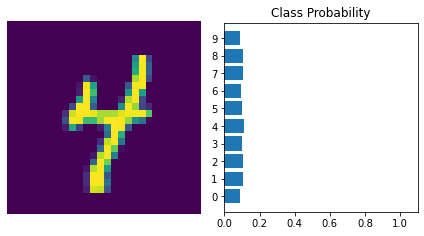

In [131]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Testing & Evaluation

In [132]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of test error =", all_count-correct_count)
print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of test error = 9018
Number Of Images Tested = 10000

Model Accuracy = 0.0982


### plots

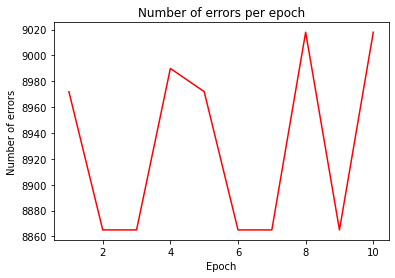

In [133]:
# data to be plotted
x = np.arange(1, epochs+1)
y = plot
# plotting
plt.title("Number of errors per epoch")
plt.xlabel("Epoch")
plt.ylabel("Number of errors")
plt.plot(x, y, color ="red")
plt.show()

In [134]:
len(plot)

10